In [3]:
options(repr.plot.weight=8,repr.plot.height=4) #Tamaño del grafico

In [4]:
aplicar_transformacion<-function(serie=x,tipo=1,retardo=1){ #la serie por defecto será x,
                                                  ##El tipo 1 (por defecto) hará referencia a la diferenciacion de los datos (Cambio Absoluto)
                                                  ###El tipo 2 hará referencia a la transformacion Pt/Pt-1 (Rentabilidad bruta simple)
                                                  ####El tipo 3 hara referencia a la tranformacion Pt/Pt-1 -1 (Rentabilidad neta simple)
                                                  #####El tipo 4 hara referencia la transformacion log(Pt/Pt-1) Rentabilidad logaritmica
                                                  ######El tipo 5 hara referencia a la transformacion raiz cuadrada
                                                  #######El tipo 6 hara referencia  a la transformacion raiz cubica
                                                  ########El tipo 7 hara referenica a la transformacion ln(Pt)
    if(tipo==1){
        transformada<-diff(serie,retardo)
    }
    if(tipo==2){
        transformada<-c(NaN,serie[2:length(serie)]/serie[1:length(serie)-1])
    }
    
    if(tipo==3){
        transformada<-c(NaN,(serie[2:length(serie)]/serie[1:length(serie)-1])-1)
    }
    
    if(tipo==4){
        transformada<-c(NaN,log(serie[2:length(serie)]/serie[1:length(serie)-1]))
    }
    
    if(tipo==5){
        transformada<-sqrt(serie)
    }
    
    if(tipo==6){
        transformada<-(serie)^(1/3)
    }
    
    if(tipo==7){
        transformada<-log(serie)
    }
    return(transformada)
}

#Construir inversa


In [5]:
graficos_ACF<-function(serie=x,nombre=" ",retardos=1){
    par(mfrow=c(1,1))
    acf(serie,retardos,main=nombre)
    pacf(serie,retardos,main=nombre)
}

In [6]:
imprimir_histograma<-function(serie=x,leyenda="topleft"){
    hist(serie,breaks=100,freq=FALSE,main="Histograma")                                      #imprime el histograma 
    datos_normales<-rnorm(1000000,mean = mean(serie),sd=sqrt(var(serie)))                    #propone una serie normal
    curve(dnorm(x,mean(datos_normales),sd(datos_normales)),col="blue",lty=2,lwd=3,add=TRUE)  #dibuja una campana normal
    d<-density(serie)                                                                        #Densidad no parametrica
    lines(d,col="red",lwd=2)                                                                 #Dibuja una densidad no parametrica
    
    legend(leyenda,c("Distribución no parametrica","Distribución normal"),col=c("red","blue"),lwd=c(3,3),bty="n") #Leyenda
}

In [7]:
datos<-read.csv("Precios_1995.csv", header=TRUE, sep = "," ,dec = ".") # Cargo la base de datos donde estan mis series de precios y variables explicativas

In [8]:
x<-datos$X..KWh_Const_Dic_2008 #Se separan los datos de interes, los precios sin inflacion
x<-ts(x,frequency = 1) #se le da formato  de serie de tiempo a nivel diario

# Modelos de Heteroscedasticidad Condicional
El objetivo de este capitulo es estudiar algunos metodos y modelos econometricos disponibles en la literatura ´para modelar la volatilidad de los retornos de un activo.

Los modelos son conocidos como modelos de heterocedasticidad condicional

## Caracteristicas de la volatilidad
La volatilidad de un activo no es directamente observable. Por ejemplo, si consideramos los retornos logaritmicos de una accion, la volatilidad diaria no es directamente observable desde los datos porque solo hay un dato al final del dia.

Con el modelo de Black-Scholes se puede obtener una volatilidad implicita si se despeja de la formula pero esto es crtiticado porque se basa en un modelo que tiene unos supuestos que no se cumplen para algunos mercados.
La experiencia ha mostrado que la volatilidad implicita es mas grande que la que se puede obtener con un modelo GARCH
Esto es debido a la valoracion del riesgo.
El VIX o el CBOE son indicadores de volatilidad implicita.
De la volatilidad entonces se puede decir que:

1. Tiene rangos de tiempo donde su comportamiento es similar (llamados Cluster)
2. La volatilidad es continua en el tiempo
3. La volatilidad no diverge a infito, es decir siempre estará dentro de un rango real. Estadisticamente hablando esto significa que la volatilidad es estacionaria a veces.
4. La volatilidad reacciona de forma diferente ante grandes aumentos de precios o caidas. Esto es conocido como el efecto de apalancamiento.

Estas propiedades juegan un papel importante en el desarrollo de modelos de volatilidad. Algunos modelos fueron propuestos especificamente para capturar estas caracteristicas mencionadas. Como por ejemplo el EGARCH fue diseñado para capturar la asimetria inducida por grandes cambios en los retornos de algunos activos.

## Estrucrtura de un modelo
Suponga que $r_t$ es el retorno de un activo en el tiempo $t$. La idea básica detras de la volatilidad es que la serie de $r_t$ es incorrelacionada pero es una serie dependiente. Veamos un ejemplo en el siguiente "In[ ]" se muestran la grafica de los rendimientos logaritmicos del precio de la electricidad en Colombia, desde julio de 1995 hasta mayo de 2016 

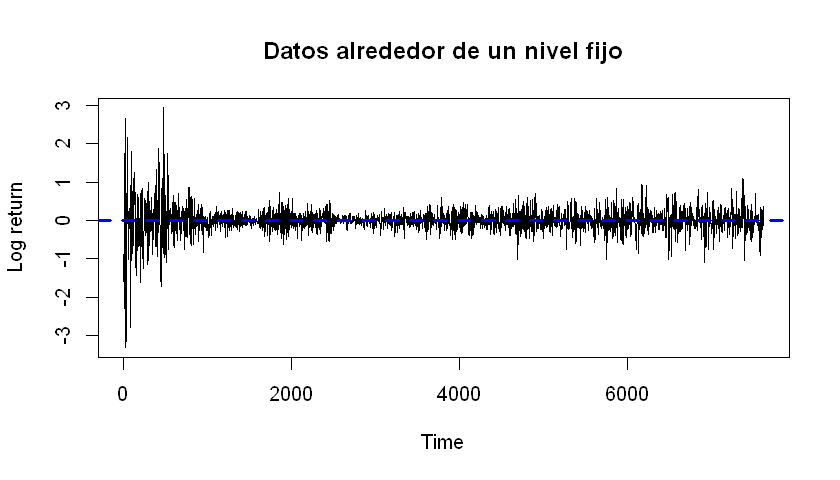

In [9]:
diff_log_pt<-aplicar_transformacion(aplicar_transformacion(x,tipo = 7),1,retardo = 7)

plot(diff_log_pt,type="l",ylab="Log return",main="Datos alrededor de un nivel fijo")
abline(h = 0, lwd=3,lty=2, col="blue")

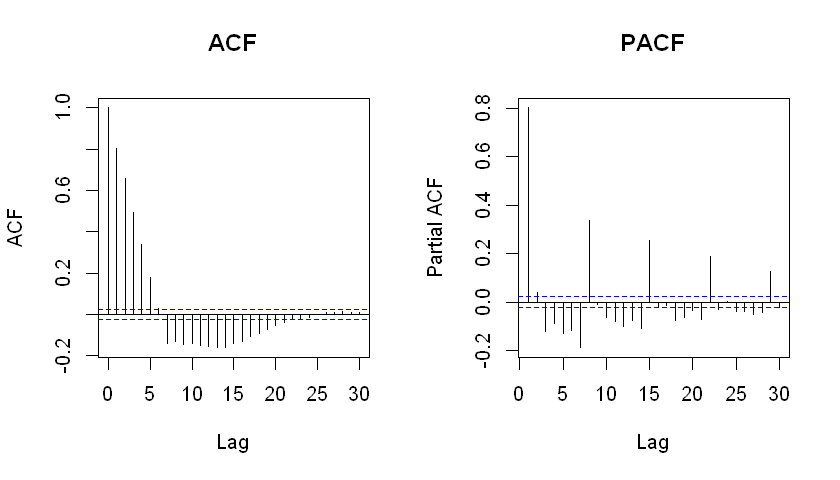

In [10]:
par(mfrow=c(1,2))
acf(diff_log_pt,lag.max = 30, main="ACF")
pacf(diff_log_pt,lag.max = 30, main="PACF")


In [11]:
m1<-arima(x = diff_log_pt,order = c(38,0,8),include.mean = F)

ERROR: Error in optim(init[mask], armafn, method = optim.method, hessian = TRUE, : non-finite finite-difference value [18]


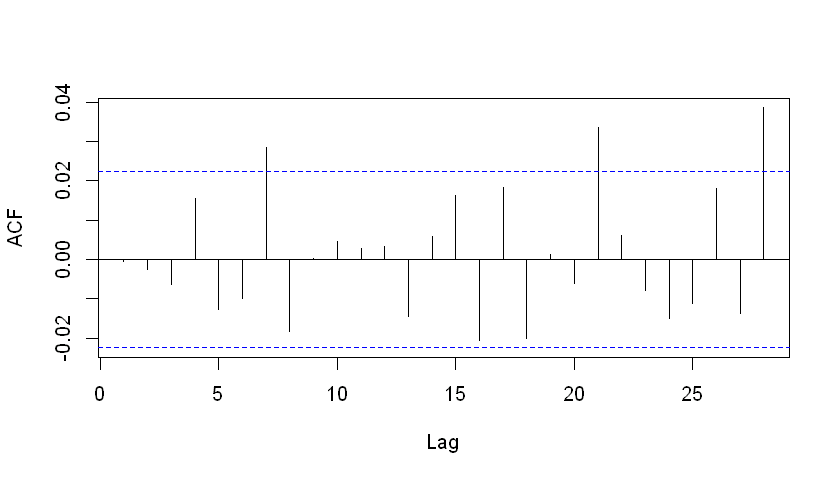

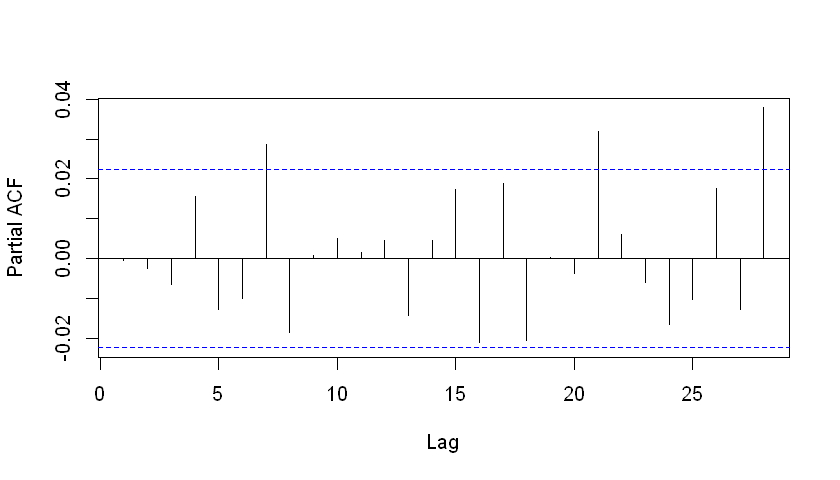

In [182]:
graficos_ACF(m1$residual,retardos = 28)

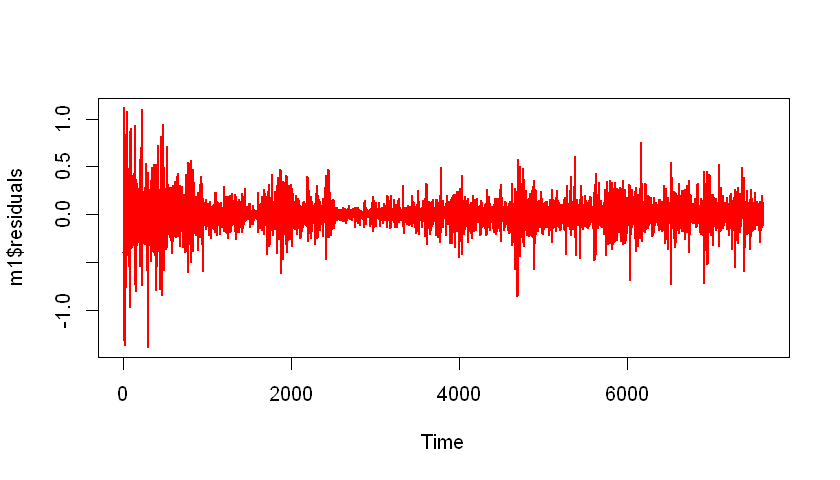

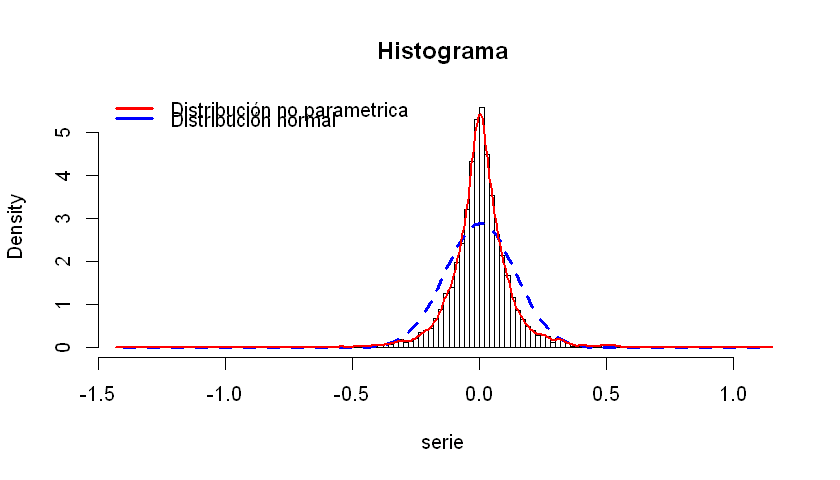

In [146]:
plot(m1$residuals, type="l",col="red",lwd=2)
imprimir_histograma(m1$residuals)

In [147]:
m1_res<-m1$residuals+1

En este punto, tras haber transformado los retornos logaritmicos,se puede decir que se puede ajustar un ARMA($p,q$) para modelar el comportamiento en la media de la serie. Los modelos de volatilidad intentan capturar la dependencia de los retornos 

Los modelos de heterocedasticidad condicional de este capitulo son relacionados con la evolucion de $\sigma^2$.
El primer tipo de modelos usa una funcion exacta para describir la evolucion de $\sigma^2$.
El segundo tipo de modelos usa ecuaciones estocasticas para describir $\sigma^2$.
Los GARCH son del tipo 1 mientras que los modelos estocasticos son del tipo 2.

A traves del libro $a_t$ es conocido como el shock o la innovacion de un rendimiento de un activo. El modelo definido para $\mu$ es el modelo para describir la media y el modelo definido para $\sigma^2$ es la ecuacion de volatilidad.

## Construccion del modelo
Construir un modelo de volatilidad consiste en 4 pasos:
1. Especificar un modelo para la media, probando la dependencia de los datos y si es necesario construyendo un modelo ARMA para los retornos que remueva la dependencia lineal de la serie.
2. Utilizar los residuos de la serie para identificar los efectos ARCH.
3. Especificar un modelo de volatilidad si los efectos ARCH son significativos y ajuste una estimacion conjunta para la media y la volatilidad.
4. Pruebe el modelo ajustado cuidadosamente y refine si es necesario

Para la mayoria de series de rendimientos, la correlacion es debil en caso de existir. Construir un modelo para la media para remover la media muestral de los datos si la media es significativamente diferente de cero. Algunas estimaciones requieren usar variables explicativas para indicar efectos de fin de semana o eneros.

## Evaluando los efectos ARCH

Para facilitar la notacion, $a_t=r_t-\mu_t$ serán los residuales de la ecuacion de media. los $a_t^2$ son usados para revisar la heterocedasiticidad condicional, conocida como los efectos ARCH. Dos pruebas son comunes:

1. Usando el estadistico Ljung-Box para los $a_t^2$: La $H_0$ es que los primeros m retardos del ACF de $a_t^2$ son cero
2. Usando la prueba de Multiplicador de Lagrange donde se prueba que $\alpha_i=0$ en la regresion lineal $a_t^2=\alpha_0+\alpha_1a_{t-1}^2+...+\alpha_ma_{t-m}^2+e_t$ 

## modelo ARCH
Es el primer modelo desarrollado para modelar la volatilidad.
La idea fundamental es que:
1. Los shocks $a_t$ son incorrelacionados pero dependientes 
2. La dependencia de $a_t$ puede ser descrita por una funcion cuadratica de los rezagos.
Un ARCH asume que:

$a_t=\sigma e_t$
$\sigma^2=\alpha_0+\alpha_1a_{t-1}^2+...+\alpha_ma_{t-m}^2

Donde $e_t$ es una secuencia de variables aleatorias independientes e identicamente distribuiudas iid.

En la practica los $e_t$ son una distribucion normal $N\sim(0,1)$

Desde la estructura del modelo, una gran innovacion implica una gran varianza condicional para la siguiente innovacion. Consecuentemente, $a_t$ ***tiende*** a asumir un gran valor en valor absoluto. Esta caracteristica es comun en los cluster de volatilidad observadas en los retornos de los activos.

En los ejemplos se presentan un ACF donde todos los valores son cero pero un PACF que muestra algunos valores significativos. Esto significa que hay que modelar el efecto ARCH de la serie.




## Propiedades de los modelos ARCH
Estudiemos el ARCH(1), donde:

$a_t=\sigma e_t$
$\sigma^2=\alpha_0+\alpha_1a_{t-1}^2$

Donde $\alpha_0>0$ ,               $\alpha_1>=0$

1. La media incondicional debe ser cero
2. La varianza incondicional debe ser $\alpha_0+\alpha_1E(a_{t-1}^2$)
3. Se necesita que el cuarto momento curtosis es incondicional, esto genera una cola pesada a la derecha

## Debilidades de los modelos ARCH

1. El modelo asume que tanto las innnovaciones positivas como negativas tienen el mismo efecto sobre la volatilidad porque dependen del cuadrado del anterior innovacion. En el mercado es sabido que el precio responde diferente a cambios positivos y negativos.

2. El modelo ARCH es muy restrictivo porque obliga que $\alpha_1 [0,\frac{1}{3}] $ para que el cuarto momento sea finito. En la practica esto limita la habilidad para capturar el exceso de curtosis.
3. Los modelos ARCH no proveen una vision para entender la fuente de la variacion de una serie financiera. ellos solamente son una forma de describir el comportamiento de la varianza condicional.
4. Los modelos ARCH pueden sobrepredecir los valores porque responden lento a valores aislado de las innovaciones de la serie

## Construir un modelo ARCH

Especificar un modelo ARCH es facil

### Determinacion del orden:

Se puede usar el PACF de las $a_t^2$ para determinar el orden. El PACF no es eficiente para muestras pequeñas.

### Estimacion

Algunas funciones de probabilidad son utilizadas para determinar el orden del modelo ARCH dependiendo del supuesto de distribucion de los $e_t$.
1. Bajo el supuesto de normalidad simetrica
2. Suponiendo que los $e_t$ tienen una cola pesada
    + Distribucion t-Student
3. Colas pesadas simetricas
    + Distribucion t-Student simetrica
El paquete para reproducir estas distribuciones es **library(fGarch)** y los comandos son sstd (Skew Student T), snorm (skew norma) y sged (skew GED).

## Puebas del modelo 
Los residuales estandarizados $\hat{a_t}=\frac{a_t}{\sigma_t}$ deben ser un ruido blanco, tambien se puede evidenciar por:

+ asimetria
+ curtosis
+ qqplot

## Pronostico

Se pueden obtener pronosticos recursivos como un modelo AR

## Ejemplo pagina 123

Se revisa el ACF de una serie y tiene valores que no son cero, se le hace la transformacion:
+ Al cuadrado
+ Valor Absoluto

Y de ninguna manera se puede eliminar los valores que no son cero.

** Esto evidencia la presencia de un proceso ARCH**

Se confirma con la prueba ARCH y se procede a estimar el parametro del modelo ARCH

El ACF que se vuelve cero en 4 indica que el modelo es ARCH(3) y se procede a estimar los parametros. 

Se chequea que los parametros sean significativos y en caso contrario se remueven de la ecuacion.

Finalmente se chequea que el $\hat{a_t}$ sea un ruido blanco y efectivamente sirve para modelar los precios.



In [148]:
library(tseries)

In [192]:
log_pt<-aplicar_transformacion(x,tipo = 7)

In [194]:
diff_ensayo2<-aplicar_transformacion(serie = log_pt,tipo = 1)

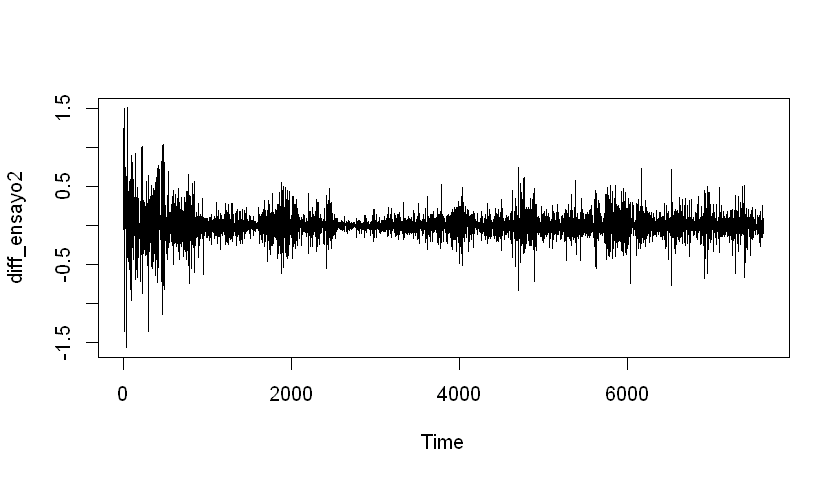

In [195]:
plot(diff_ensayo2)

In [205]:
diff_estacional2<-diff(diff_ensayo2,lag = 7)

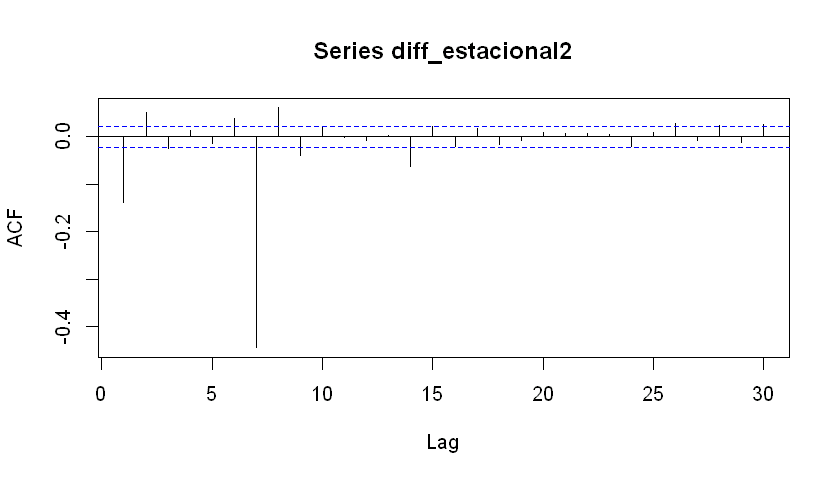

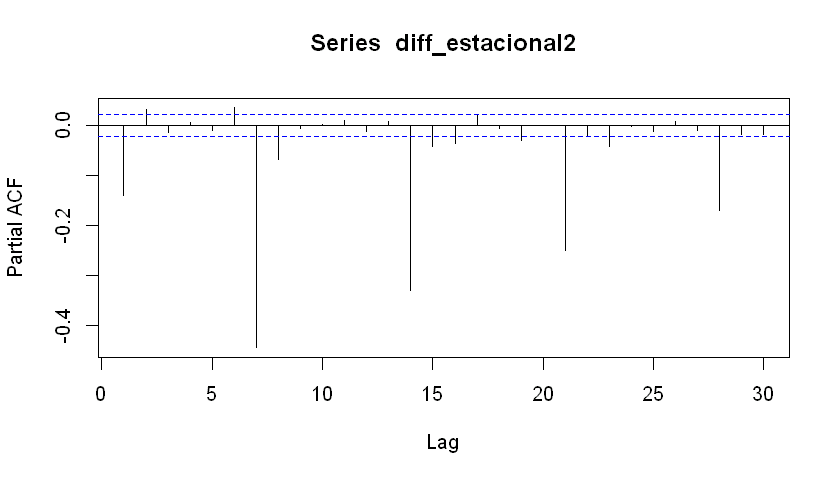

In [209]:
acf(diff_estacional2,lag.max = 30)
pacf(diff_estacional2,lag.max = 30)

In [244]:
m_ensayo2<-arima(x = diff_estacional2,order = c(5,0,4),include.mean = F)

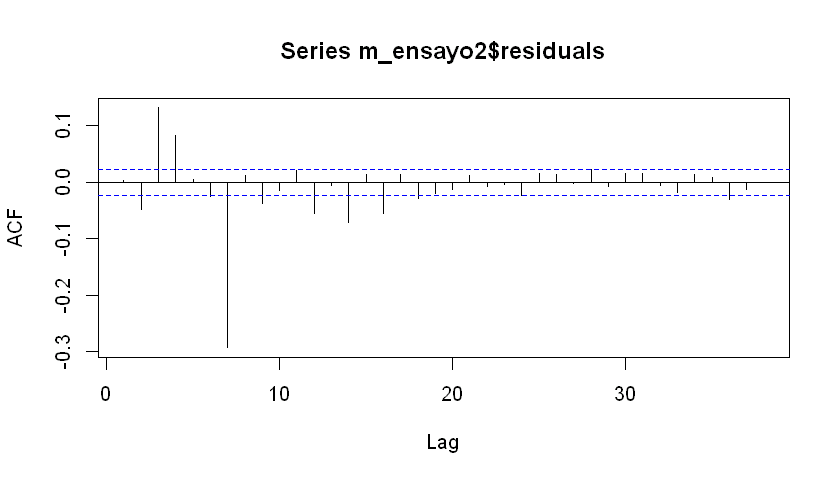

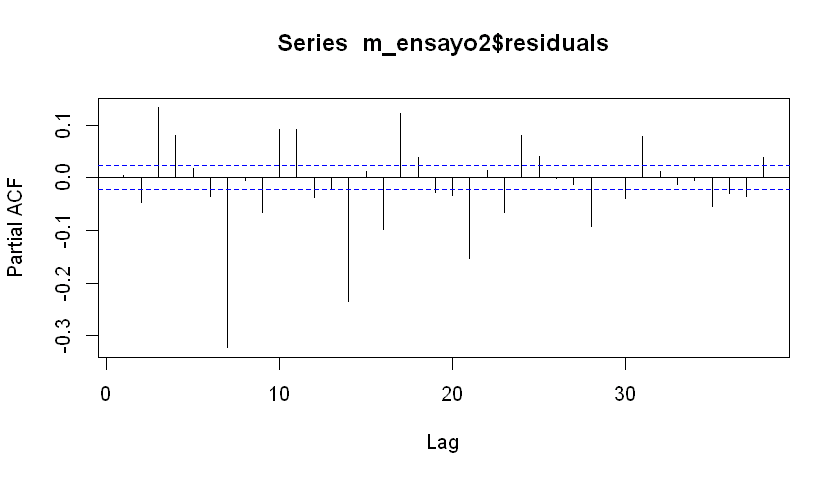

In [245]:
acf(m_ensayo2$residuals)
pacf(m_ensayo2$residuals)

In [ ]:
En la ayuda de mathlab en el financial toolbox de mathlab hay librerias con explicacion de procesos estocasticos de estos modelos.

en Wiley "Derivatives analytics with Python", el lo busco en amazon y le salio

The PythonQuants
Dxanalytics - hacer una mirada critica

Debemos proveer la herramienta en Python.

funcion auto.arima para que me diga cual es el mejor modelo.


